In [1]:
#Created on Saturday May 14, 2022 
#author: Kayla Brock

In [200]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np 
import matplotlib.pyplot as plt 
import math
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer
import warnings 
warnings.filterwarnings("ignore")
import acquire
import seaborn as sns 
import pydataset as p
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
### Feature Importance 
tenure, total_charges, monthly_charges, contract_type, internet_service, payment_type_electronic_check

In [3]:
df = acquire.get_telco_data()

Using cached csv


In [4]:
df.to_csv("eTelcoData.csv", index=False)

### Step 1 

### Summarize Data

In [5]:
#High level overvue
#DataFrame contains int, float, boolean, and string values
df.head(3)

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check


In [6]:
#Mean monthly charge 64 dollars 
#Min Charge is 18.25
#Max Charge is 118.75
#no outliers
df.monthly_charges.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthly_charges, dtype: float64

In [7]:
#dummy chart in place of where I want a chart 


In [8]:
#mean 2283 
#min 18.80
#max 8684.80 
#no outliers
df.total_charges.describe()

count     7043
unique    6531
top           
freq        11
Name: total_charges, dtype: object

In [9]:
#dummy chart


In [10]:
#AAAAAAAA*********Need a way to confirm tenure is in 'months'
#Mean tenure 32 months 
#Min tenure 0 months 
#Max tenure 72 months 
#no outliers
df.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [11]:
#dummy chart


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [13]:
df.isnull().sum()

payment_type_id             0
contract_type_id            0
internet_service_type_id    0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
internet_service_type       0
contract_type               0
payment_type                0
dtype: int64

In [14]:
df.value_counts().sum()

7043

In [15]:
df.shape

(7043, 24)

### Checking for outliers

In [16]:
df.columns

Index(['payment_type_id', 'contract_type_id', 'internet_service_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'internet_service_type', 'contract_type',
       'payment_type'],
      dtype='object')

Payment Types: 
    1. Electronic check 
    2. Mailed Check 
    3. Bank Transfer (automatic)
    4. Credit Card (automatic )

In [17]:
#Four types of payment offered at Telco
df['payment_type_id'].value_counts()

1    2365
2    1612
3    1544
4    1522
Name: payment_type_id, dtype: int64

In [18]:
#Duplicate column: put key of corresponding values above payment_type_id 
#Consider dropping column 
df['payment_type'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: payment_type, dtype: int64

Contract Types Key: 1. Month-to-Month.   2. One Year    3. Two Year

In [19]:
df['contract_type_id'].value_counts()

1    3875
3    1695
2    1473
Name: contract_type_id, dtype: int64

In [20]:
#Duplicate column consider dropping before ML
df['contract_type'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: contract_type, dtype: int64

Internet Service Type Key: 1. DSL 2. Fiber Optic  3. No Internet Service at this time

In [21]:
df['internet_service_type_id'].value_counts()

2    3096
1    2421
3    1526
Name: internet_service_type_id, dtype: int64

In [22]:
#key written above internet service type id
#consider dropping column before machine learning 
df['internet_service_type'].value_counts()

Fiber optic    3096
DSL            2421
None           1526
Name: internet_service_type, dtype: int64

In [23]:
#unique identifier 
#consider dropping column 
#no outliers 
df['customer_id'].value_counts()

0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: customer_id, Length: 7043, dtype: int64

In [24]:
#Two Genders
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [25]:
#Total of 1142 senior citizen customers 
df['senior_citizen'].value_counts()

0    5901
1    1142
Name: senior_citizen, dtype: int64

In [26]:
#what does this even actually mean? 
df['partner'].value_counts()

No     3641
Yes    3402
Name: partner, dtype: int64

In [27]:
#over 2k customers with dependents, what does this mean? do their kids have phones? 
df['dependents'].value_counts()

No     4933
Yes    2110
Name: dependents, dtype: int64

In [28]:
#The two greatest subsets of tenure are those who have been with telco for one year and those that have been with 
#telco 6 years. I think it is important to investigate the demographics of the customers who have been with telco the 
#longest period of time 
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
9     119
70    119
12    117
10    116
6     110
13    109
68    100
15     99
11     99
67     98
18     97
69     95
24     94
22     90
66     89
35     88
17     87
23     85
16     80
56     80
52     80
64     80
25     79
26     79
14     76
65     76
61     76
60     76
46     74
19     73
27     72
29     72
30     72
63     72
20     71
53     70
62     70
41     70
32     69
50     68
54     68
47     68
51     68
58     67
49     66
31     65
43     65
42     65
34     65
57     65
37     65
40     64
48     64
33     64
55     64
21     63
45     61
59     60
38     59
28     57
39     56
44     51
36     50
0      11
Name: tenure, dtype: int64

In [29]:
df['phone_service'].value_counts()

Yes    6361
No      682
Name: phone_service, dtype: int64

In [30]:
df['multiple_lines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64

In [31]:
df['online_security'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: online_security, dtype: int64

In [32]:
df['online_backup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: online_backup, dtype: int64

In [33]:
df['device_protection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: device_protection, dtype: int64

In [34]:
df['tech_support'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: tech_support, dtype: int64

In [35]:
df['streaming_tv'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: streaming_tv, dtype: int64

In [36]:
df['streaming_movies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: streaming_movies, dtype: int64

In [37]:
df['paperless_billing'].value_counts()

Yes    4171
No     2872
Name: paperless_billing, dtype: int64

In [38]:
df['churn'].value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

### Step 2

### Clean the Data

In [39]:
#Drop duplicates 
df = df.drop_duplicates()
df.shape

(7043, 24)

In [40]:
df.shape

(7043, 24)

In [41]:
#drop all duplicate columns 
cols_to_drop = ['customer_id', 'payment_type_id', 'internet_service_type_id', 'contract_type_id']
df = df.drop(columns=cols_to_drop)

In [42]:
df.isnull().sum()

gender                   0
senior_citizen           0
partner                  0
dependents               0
tenure                   0
phone_service            0
multiple_lines           0
online_security          0
online_backup            0
device_protection        0
tech_support             0
streaming_tv             0
streaming_movies         0
paperless_billing        0
monthly_charges          0
total_charges            0
churn                    0
internet_service_type    0
contract_type            0
payment_type             0
dtype: int64

In [43]:
#Drop null values stored as whitespace
df['total_charges'] = df['total_charges'].str.strip()
df = df[df.total_charges != '']

In [44]:
#validate no nulls in dataset 
df.isnull().sum()

gender                   0
senior_citizen           0
partner                  0
dependents               0
tenure                   0
phone_service            0
multiple_lines           0
online_security          0
online_backup            0
device_protection        0
tech_support             0
streaming_tv             0
streaming_movies         0
paperless_billing        0
monthly_charges          0
total_charges            0
churn                    0
internet_service_type    0
contract_type            0
payment_type             0
dtype: int64

In [45]:
#change total_charges to float type 
df['total_charges'] = df.total_charges.astype(float)

#Convert binary categorical variables to numeric 

In [46]:

df['is_female'] = df.gender.map({'Female': 1, 'Male': 0})

In [47]:
df['has_partner'] = df.partner.map({'Yes': 1, 'No':0})

In [48]:
df['has_dependents'] = df.dependents.map({'Yes': 1, 'No':0})

In [49]:
df['has_phone_svc'] = df.phone_service.map({'Yes': 1, 'No':0})

In [50]:
df['has_paperless_bill'] = df.paperless_billing.map({'Yes': 1, 'No':0})

In [51]:
df['has_churned'] = df.churn.map({'Yes': 1, 'No':0})

#get dummies for non-binary categorical variables 

In [52]:
 dummy_df = pd.get_dummies(df[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type']], dummy_na=False, \
                              drop_first=True)
    

#concatenate dummy dataframe to original 

In [53]:
df = pd.concat([df, dummy_df], axis=1)

### Split the data 

In [54]:
def split_telco_data(df):
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.churn)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123, stratify=train_validate.churn)
    return train, validate, test

In [55]:
train, validate, test = split_telco_data(df)

In [56]:
train.shape

(3937, 47)

In [57]:
validate.shape

(1688, 47)

In [58]:
test.shape

(1407, 47)

### Explore the Data

Just the customers that have been with us for three months 

In [419]:
train.head(5)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type,is_female,has_partner,has_dependents,has_phone_svc,has_paperless_bill,has_churned,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,tenure_bin,dsl,device_protection_no,online_security_No
5919,Female,0,No,No,58,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,71.10,4299.20,No,DSL,One year,Credit card (automatic),1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,over_three_years,1,0,0
1915,Male,0,No,Yes,71,Yes,Yes,Yes,Yes,No,No,No,No,Yes,85.45,6028.95,No,Fiber optic,One year,Credit card (automatic),0,0,1,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,over_three_years,0,1,0
5054,Female,0,Yes,Yes,35,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,25.75,882.55,No,None,Month-to-month,Electronic check,1,1,1,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,btwn_thirtythree_and_thirtysix,0,0,0
2355,Male,0,Yes,Yes,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,19.20,19.20,No,None,Month-to-month,Mailed check,0,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,brand_new,0,0,0
6279,Male,1,No,No,20,Yes,No,Yes,No,No,Yes,No,No,No,54.00,1055.90,No,DSL,One year,Mailed check,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,btwn_eighteen_and_twentyone,1,1,0


In [655]:
train.streaming_movies.value_counts()

Yes                    1541
No                     1529
No internet service     867
Name: streaming_movies, dtype: int64

In [298]:
train['dsl'] = train.internet_service_type == 'DSL'

In [300]:
train["dsl"] = train["dsl"].astype(int)

In [370]:
train['device_protection_no'] = train.device_protection == 'No'

In [371]:
train["device_protection_no"] = train["device_protection_no"].astype(int)

In [417]:
train['online_security_No'] = train.online_security == 'No'

In [418]:
train["online_security_No"] = train["online_security_No"].astype(int)

In [449]:
train['tech_support_No'] = train.tech_support == 'No'

In [450]:
train["tech_support_No"] = train["tech_support_No"].astype(int)

In [508]:
train['online_backup_No'] = train.online_backup == 'No'

In [509]:
train["onine_backup_No"] = train["online_backup_No"].astype(int)

In [510]:
train.head(2)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type,is_female,has_partner,has_dependents,has_phone_svc,has_paperless_bill,has_churned,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,tenure_bin,dsl,device_protection_no,online_security_No,tech_support_No,online_backup_No,onine_backup_No
5919,Female,0,No,No,58,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,71.10,4299.20,No,DSL,One year,Credit card (automatic),1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,over_three_years,1,0,0,0,False,0
1915,Male,0,No,Yes,71,Yes,Yes,Yes,Yes,No,No,No,No,Yes,85.45,6028.95,No,Fiber optic,One year,Credit card (automatic),0,0,1,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,over_three_years,0,1,0,1,False,0


<AxesSubplot:xlabel='internet_service_type', ylabel='monthly_charges'>

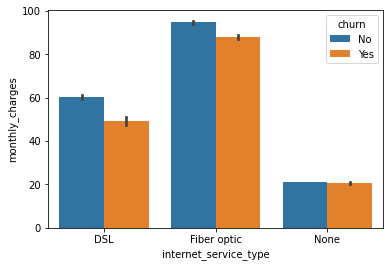

In [278]:
sns.barplot(x=train.internet_service_type, y=train.monthly_charges, hue= train.churn)

### First Three Months

In [456]:
first_three_month_customers = (train['tenure'] <= 3)
new_customers = train[first_three_month_customers]
new_customers.head(3)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type,is_female,has_partner,has_dependents,has_phone_svc,has_paperless_bill,has_churned,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,tenure_bin,dsl,device_protection_no,online_security_No,tech_support_No
2355,Male,0,Yes,Yes,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,19.20,19.20,No,None,Month-to-month,Mailed check,0,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,brand_new,0,0,0,0
3320,Male,0,No,No,1,Yes,No,No,No,No,No,No,Yes,No,55.55,55.55,No,DSL,Month-to-month,Mailed check,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,brand_new,1,1,1,1
4551,Male,0,Yes,Yes,1,Yes,No,No,No,No,No,No,No,Yes,68.50,68.50,Yes,Fiber optic,Month-to-month,Electronic check,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,brand_new,0,1,1,1


In [369]:
new_customers.device_protection.value_counts()

No                     387
No internet service    153
Yes                     64
Name: device_protection, dtype: int64

In [313]:
new_customers = new_customers.drop(columns=['gender', 'partner', 'dependents', 'tenure_bin', 'phone_service', 'multiple_lines',  'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'internet_service_type', 'contract_type', 'payment_type'])

### Drivers of Churn

<AxesSubplot:xlabel='tenure', ylabel='tech_support_No internet service'>

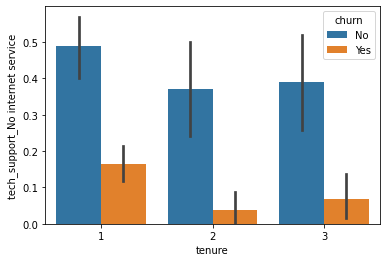

In [230]:
sns.barplot(x=new_customers.tenure, y=new_customers['tech_support_No internet service'], hue=new_customers.churn)

<AxesSubplot:xlabel='tenure', ylabel='internet_service_type_Fiber optic'>

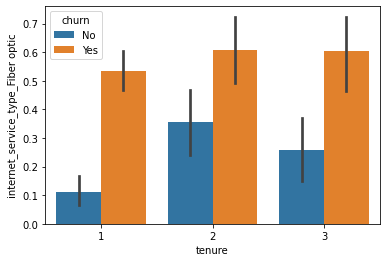

In [284]:
sns.barplot(x=new_customers.tenure, y=new_customers['internet_service_type_Fiber optic'], hue= new_customers.churn)

In [289]:
new_customers['internet_service_type_Fiber optic'].value_counts()

0    356
1    248
Name: internet_service_type_Fiber optic, dtype: int64

<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

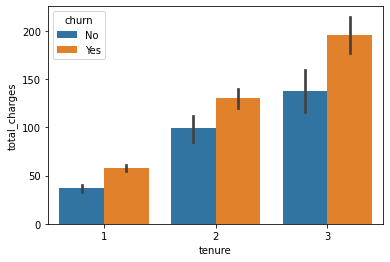

In [285]:
sns.barplot(x=new_customers.tenure, y=new_customers.total_charges, hue= new_customers.churn)

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

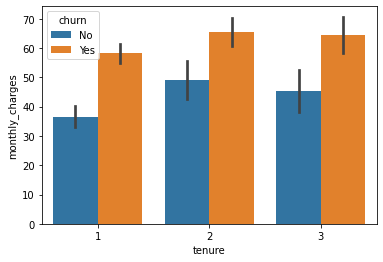

In [286]:
sns.barplot(x=new_customers.tenure, y=new_customers.monthly_charges, hue= new_customers.churn)

<AxesSubplot:xlabel='tenure', ylabel='senior_citizen'>

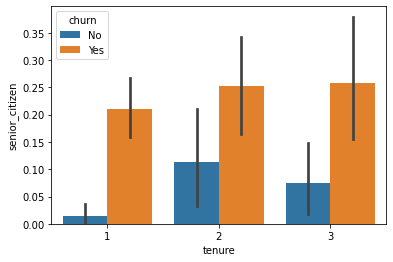

In [287]:
sns.barplot(x=new_customers.tenure, y=new_customers.senior_citizen, hue= new_customers.churn)

In [288]:
new_customers.senior_citizen.value_counts()

0    511
1     93
Name: senior_citizen, dtype: int64

In [515]:
new_customers.head(3)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type,is_female,has_partner,has_dependents,has_phone_svc,has_paperless_bill,has_churned,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,tenure_bin,dsl,device_protection_no,online_security_No,tech_support_No,online_backup_No,onine_backup_No
2355,Male,0,Yes,Yes,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,19.20,19.20,No,None,Month-to-month,Mailed check,0,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,brand_new,0,0,0,0,False,0
3320,Male,0,No,No,1,Yes,No,No,No,No,No,No,Yes,No,55.55,55.55,No,DSL,Month-to-month,Mailed check,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,brand_new,1,1,1,1,True,1
4551,Male,0,Yes,Yes,1,Yes,No,No,No,No,No,No,No,Yes,68.50,68.50,Yes,Fiber optic,Month-to-month,Electronic check,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,brand_new,0,1,1,1,True,1


In [516]:
new_customers = new_customers.drop(columns=['gender', 'partner', 'dependents', 'tenure_bin', 'phone_service', 'multiple_lines',  'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'internet_service_type', 'contract_type', 'payment_type'])

In [517]:
new_customers.head(3)

,senior_citizen,tenure,monthly_charges,total_charges,churn,is_female,has_partner,has_dependents,has_phone_svc,has_paperless_bill,has_churned,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,dsl,device_protection_no,online_security_No,tech_support_No,online_backup_No,onine_backup_No
2355,0,1,19.20,19.20,No,0,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,False,0
3320,0,1,55.55,55.55,No,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,True,1
4551,0,1,68.50,68.50,Yes,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,1,True,1


In [518]:
new_customers.churn.value_counts()

Yes    351
No     253
Name: churn, dtype: int64

In [519]:
X_train = new_customers.drop(columns=['churn', 'has_churned'])
y_train = new_customers.churn

X_validate = new_customers.drop(columns=['churn', 'has_churned'])
y_validate = new_customers.churn

In [520]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [521]:
clf = clf.fit(X_train, y_train)

In [522]:
y_pred = clf.predict(X_train)

In [523]:
y_pred_proba = clf.predict_proba(X_train)

In [524]:
X_train.columns[clf.feature_importances_.argsort()[::-1]]

Index(['tech_support_No', 'monthly_charges', 'dsl', 'total_charges',
       'senior_citizen', 'has_paperless_bill', 'online_security_No',
       'online_backup_No internet service', 'online_security_Yes',
       'online_security_No internet service', 'multiple_lines_Yes',
       'multiple_lines_No phone service', 'has_partner', 'has_phone_svc',
       'has_dependents', 'device_protection_No internet service', 'is_female',
       'tenure', 'online_backup_Yes', 'onine_backup_No',
       'device_protection_Yes', 'online_backup_No', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'contract_type_One year', 'contract_type_Two year',
       'internet_service_type_Fiber optic', 'internet_service_type_None',
       'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check', 'device_protection_no',
       'tech_support_No internet servi

In [388]:
X_train.internet_service_type_None.value_counts()

0    451
1    153
Name: internet_service_type_None, dtype: int64

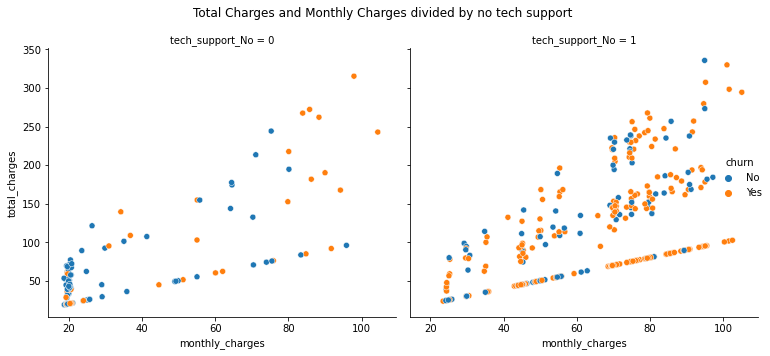

In [526]:
rel = sns.relplot(x='monthly_charges', y='total_charges', data=new_customers, col="tech_support_No", hue="churn")
rel.fig.suptitle('Total Charges and Monthly Charges divided by no tech support') 
plt.tight_layout()

In [390]:
X_train.dsl.value_counts()

0    401
1    203
Name: dsl, dtype: int64

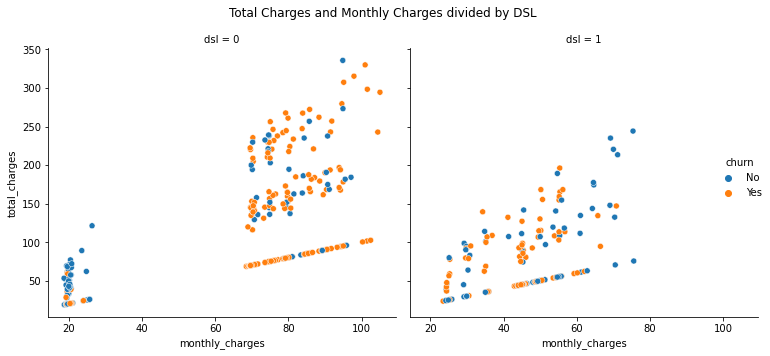

In [406]:
rel = sns.relplot(x='monthly_charges', y='total_charges', data=new_customers, col="dsl", hue="churn")
rel.fig.suptitle('Total Charges and Monthly Charges divided by DSL') 
plt.tight_layout()

In [392]:
X_train.senior_citizen.value_counts()

0    511
1     93
Name: senior_citizen, dtype: int64

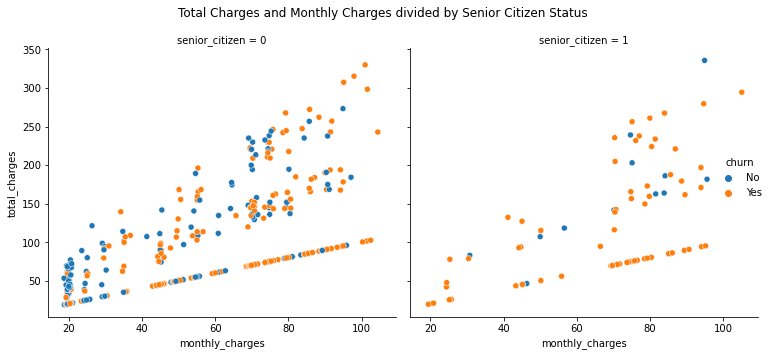

In [405]:
rel = sns.relplot(x='monthly_charges', y='total_charges', data=new_customers, col="senior_citizen", hue="churn")
rel.fig.suptitle('Total Charges and Monthly Charges divided by Senior Citizen Status') 
plt.tight_layout()

Feature importance for 0-3 months falls in this order: 
- tech support 
- dsl
- senior citizen

In [528]:
second_customers.head(3)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type,is_female,has_partner,has_dependents,has_phone_svc,has_paperless_bill,has_churned,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,tenure_bin,dsl,device_protection_no,online_security_No,tech_support_No,online_backup_No,onine_backup_No
1432,Female,0,No,No,4,Yes,No,No,Yes,No,No,No,No,No,50.70,151.3,Yes,DSL,Month-to-month,Credit card (automatic),1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,btwn_three_and_six,1,1,1,1,False,0
2961,Male,0,No,No,6,Yes,Yes,No,No,No,No,No,No,Yes,74.90,469.8,Yes,Fiber optic,Month-to-month,Electronic check,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,btwn_three_and_six,0,1,1,1,True,1
420,Male,0,Yes,Yes,4,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,18.85,84.2,No,None,Month-to-month,Mailed check,0,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,btwn_three_and_six,0,0,0,0,False,0


In [529]:
second_customers = second_customers.drop(columns=['gender', 'partner', 'dependents', 'tenure_bin', 'phone_service', 'multiple_lines',  'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'internet_service_type', 'contract_type', 'payment_type'])

In [530]:
X_train2 = second_customers.drop(columns=['churn', 'has_churned'])
y_train2 = second_customers.churn

In [531]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [532]:
clf = clf.fit(X_train2, y_train2)

In [533]:
y_pred = clf.predict(X_train2)

In [534]:
y_pred_proba = clf.predict_proba(X_train2)

In [535]:
X_train2.columns[clf.feature_importances_.argsort()[::-1]]

Index(['monthly_charges', 'online_security_Yes', 'total_charges',
       'onine_backup_No', 'multiple_lines_No phone service',
       'device_protection_No internet service', 'online_backup_Yes',
       'online_backup_No internet service',
       'online_security_No internet service', 'multiple_lines_Yes',
       'has_paperless_bill', 'online_backup_No', 'has_phone_svc',
       'has_dependents', 'has_partner', 'is_female', 'tenure',
       'device_protection_Yes', 'tech_support_No internet service',
       'tech_support_Yes', 'payment_type_Credit card (automatic)',
       'tech_support_No', 'online_security_No', 'device_protection_no', 'dsl',
       'payment_type_Mailed check', 'payment_type_Electronic check',
       'internet_service_type_None', 'streaming_tv_No internet service',
       'internet_service_type_Fiber optic', 'contract_type_Two year',
       'contract_type_One year', 'streaming_movies_Yes',
       'streaming_movies_No internet service', 'streaming_tv_Yes',
       'senio

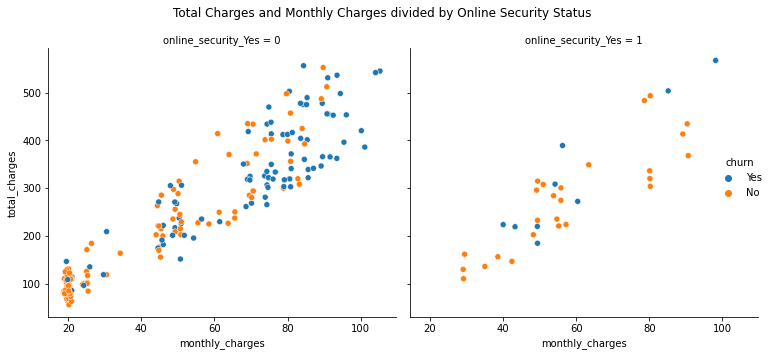

In [577]:
rel = sns.relplot(x='monthly_charges', y='total_charges', data=second_customers, col="online_security_Yes", hue="churn")
rel.fig.suptitle('Total Charges and Monthly Charges divided by Online Security Status') 
plt.tight_layout()

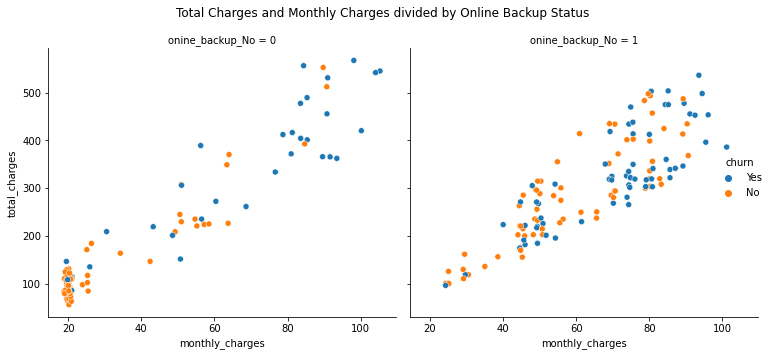

In [580]:
rel = sns.relplot(x='monthly_charges', y='total_charges', data=second_customers, col="onine_backup_No", hue="churn")
rel.fig.suptitle('Total Charges and Monthly Charges divided by Online Backup Status') 
plt.tight_layout()

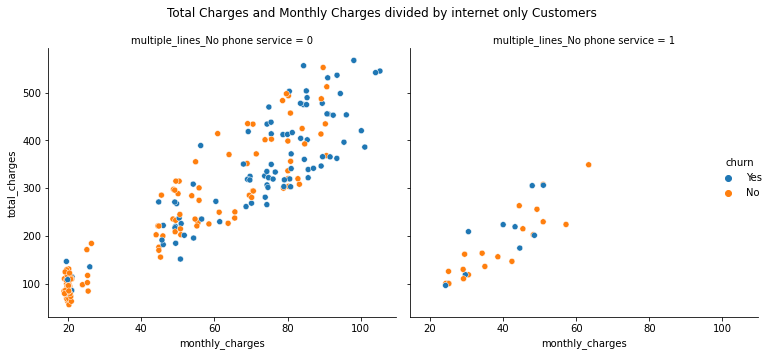

In [581]:
#multiple lines-no phone service is code for they must be internet customers
rel = sns.relplot(x='monthly_charges', y='total_charges', data=second_customers, col="multiple_lines_No phone service", hue="churn")
rel.fig.suptitle('Total Charges and Monthly Charges divided by internet only Customers') 
plt.tight_layout()

Feature importance for 4-6 months falls in this order: 
- online security 
- online backup 
- internet only customers

In [582]:
third_customers.head(2)

,senior_citizen,tenure,monthly_charges,total_charges,churn,is_female,has_partner,has_dependents,has_phone_svc,has_paperless_bill,has_churned,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,dsl,device_protection_no,online_security_No,tech_support_No,online_backup_No,onine_backup_No
4352,0,7,53.65,404.35,No,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,True,1
3771,0,7,62.80,418.30,No,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,True,1


In [585]:
#third_customers = third_customers.drop(columns=['gender', 'partner', 'dependents', 'tenure_bin', 'phone_service', 'multiple_lines',  'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'internet_service_type', 'contract_type', 'payment_type'])

In [586]:
X_train3 = third_customers.drop(columns=['churn', 'has_churned'])
y_train3 = third_customers.churn

In [587]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [588]:
clf = clf.fit(X_train3, y_train3)

In [589]:
y_pred = clf.predict(X_train3)

In [590]:
y_pred_proba = clf.predict_proba(X_train3)

In [591]:
X_train3.columns[clf.feature_importances_.argsort()[::-1]]

Index(['monthly_charges', 'tech_support_No', 'contract_type_One year',
       'multiple_lines_No phone service', 'total_charges', 'has_dependents',
       'onine_backup_No', 'online_backup_Yes',
       'online_backup_No internet service', 'online_security_Yes',
       'online_security_No internet service', 'multiple_lines_Yes',
       'has_phone_svc', 'has_paperless_bill', 'device_protection_Yes',
       'has_partner', 'is_female', 'tenure',
       'device_protection_No internet service',
       'tech_support_No internet service', 'online_backup_No',
       'tech_support_Yes', 'streaming_tv_No internet service',
       'streaming_tv_Yes', 'streaming_movies_No internet service',
       'streaming_movies_Yes', 'contract_type_Two year',
       'internet_service_type_Fiber optic', 'internet_service_type_None',
       'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check', 'dsl', 'device_protection_no',
       'online_security_No', 'senio

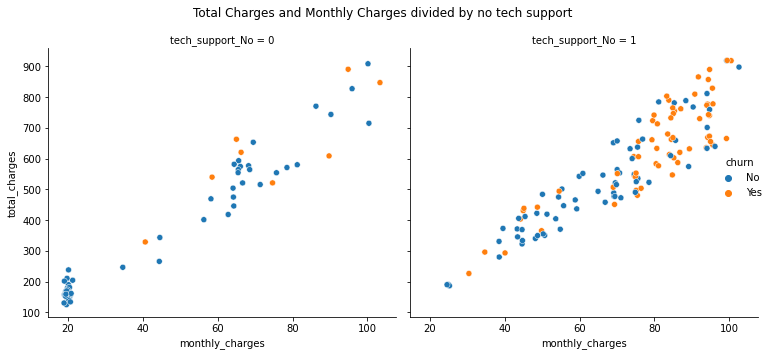

In [592]:
rel = sns.relplot(x='monthly_charges', y='total_charges', data=third_customers, col="tech_support_No", hue="churn")
rel.fig.suptitle('Total Charges and Monthly Charges divided by no tech support') 
plt.tight_layout()

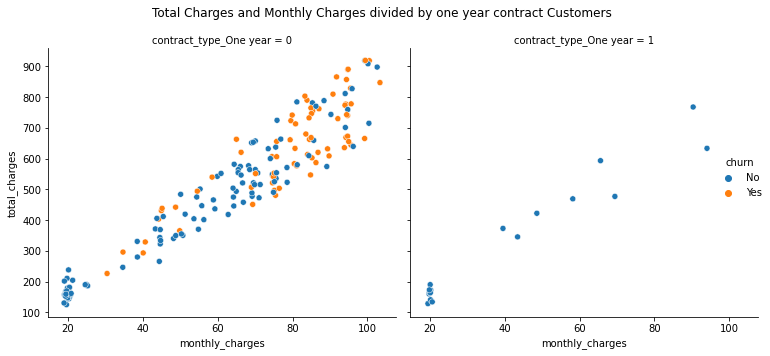

In [593]:
rel = sns.relplot(x='monthly_charges', y='total_charges', data=third_customers, col="contract_type_One year", hue="churn")
rel.fig.suptitle('Total Charges and Monthly Charges divided by one year contract Customers') 
plt.tight_layout()

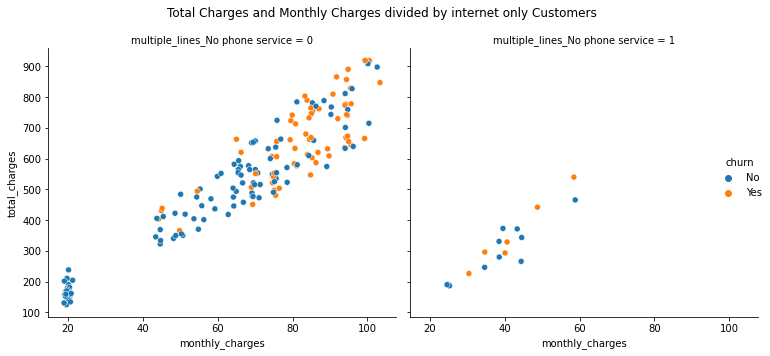

In [594]:
rel = sns.relplot(x='monthly_charges', y='total_charges', data=third_customers, col="multiple_lines_No phone service", hue="churn")
rel.fig.suptitle('Total Charges and Monthly Charges divided by internet only Customers') 
plt.tight_layout()

Features of importance between 6 and 9 months:
- tech support no
- contract type one year 
- multiple lines No phone service 


In [595]:
fourth_customers.head(3)

,senior_citizen,tenure,monthly_charges,total_charges,churn,is_female,has_partner,has_dependents,has_phone_svc,has_paperless_bill,has_churned,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,dsl,device_protection_no,online_security_No,tech_support_No,online_backup_No,onine_backup_No
3627,0,10,98.55,1008.55,Yes,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,True,1
328,0,11,19.65,225.75,No,0,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,False,0
1866,0,10,51.65,524.50,No,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,True,1


In [597]:
#fourth_customers = fourth_customers.drop(columns=['gender', 'partner', 'dependents', 'tenure_bin', 'phone_service', 'multiple_lines',  'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'internet_service_type', 'contract_type', 'payment_type'])

In [598]:
X_train4 = fourth_customers.drop(columns=['churn', 'has_churned'])
y_train4 = fourth_customers.churn

In [599]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [600]:
clf = clf.fit(X_train4, y_train4)

In [601]:
y_pred = clf.predict(X_train4)

In [602]:
y_pred_proba = clf.predict_proba(X_train4)

In [603]:
X_train4.columns[clf.feature_importances_.argsort()[::-1]]

Index(['monthly_charges', 'online_security_No', 'total_charges',
       'contract_type_One year', 'payment_type_Mailed check',
       'onine_backup_No', 'online_backup_No internet service',
       'online_security_Yes', 'online_security_No internet service',
       'multiple_lines_Yes', 'multiple_lines_No phone service',
       'has_dependents', 'has_paperless_bill', 'has_phone_svc',
       'device_protection_No internet service', 'has_partner', 'is_female',
       'tenure', 'online_backup_Yes', 'tech_support_No internet service',
       'device_protection_Yes', 'online_backup_No', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'contract_type_Two year', 'internet_service_type_Fiber optic',
       'internet_service_type_None', 'payment_type_Credit card (automatic)',
       'payment_type_Electronic check', 'dsl', 'device_protection_no',
       'tech_support_No', 'senior_citiz

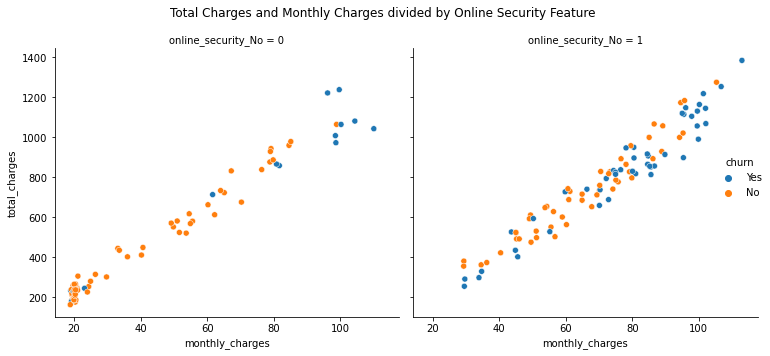

In [604]:
rel = sns.relplot(x='monthly_charges', y='total_charges', data=fourth_customers, col="online_security_No", hue="churn")
rel.fig.suptitle('Total Charges and Monthly Charges divided by Online Security Feature') 
plt.tight_layout()

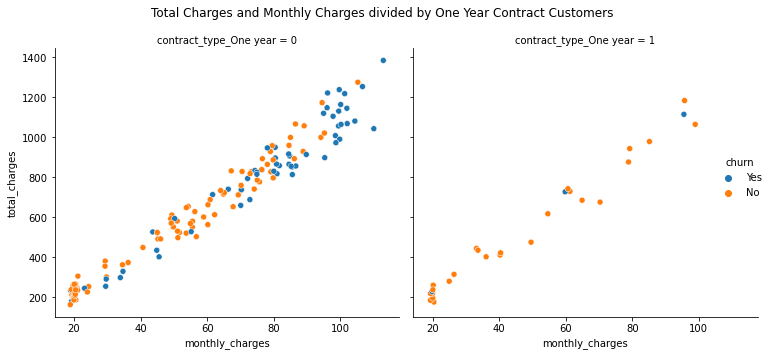

In [606]:
rel = sns.relplot(x='monthly_charges', y='total_charges', data=fourth_customers, col="contract_type_One year", hue="churn")
rel.fig.suptitle('Total Charges and Monthly Charges divided by One Year Contract Customers') 
plt.tight_layout()

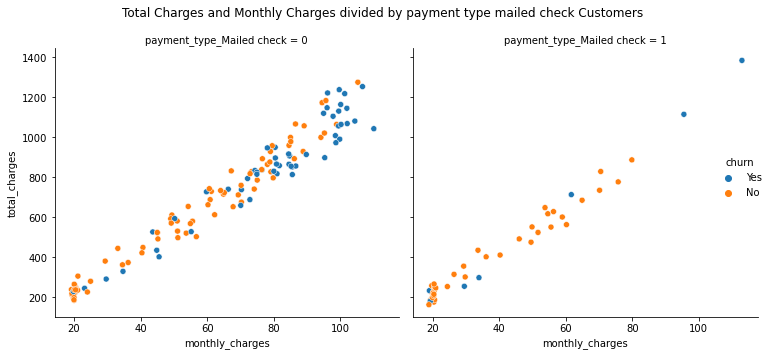

In [607]:
rel = sns.relplot(x='monthly_charges', y='total_charges', data=fourth_customers, col="payment_type_Mailed check", hue="churn")
rel.fig.suptitle('Total Charges and Monthly Charges divided by payment type mailed check Customers') 
plt.tight_layout()

Feature Importance 9-12 mos: 
- online_security_No
- contract type one year
- payment_type_Mailed check 

In [608]:
fifth_customers.head(3)

,senior_citizen,tenure,monthly_charges,total_charges,churn,is_female,has_partner,has_dependents,has_phone_svc,has_paperless_bill,has_churned,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,dsl,device_protection_no,online_security_No,tech_support_No,online_backup_No,onine_backup_No
6992,0,14,80.45,1072.0,Yes,1,0,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,True,1
3964,0,15,19.75,297.3,Yes,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,False,0
1912,0,13,19.45,270.2,No,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,False,0


In [557]:
fifth_customers = fifth_customers.drop(columns=['gender', 'partner', 'dependents', 'tenure_bin', 'phone_service', 'multiple_lines',  'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'internet_service_type', 'contract_type', 'payment_type'])

In [609]:
X_train5 = fifth_customers.drop(columns=['churn', 'has_churned'])
y_train5 = fifth_customers.churn

In [610]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [611]:
clf = clf.fit(X_train5, y_train5)

In [612]:
y_pred = clf.predict(X_train5)

In [613]:
y_pred_proba = clf.predict_proba(X_train5)

In [614]:
X_train4.columns[clf.feature_importances_.argsort()[::-1]]

Index(['internet_service_type_Fiber optic', 'total_charges',
       'online_backup_No', 'has_dependents', 'tenure', 'multiple_lines_Yes',
       'device_protection_No internet service', 'online_backup_Yes',
       'online_backup_No internet service', 'online_security_Yes',
       'online_security_No internet service', 'onine_backup_No',
       'multiple_lines_No phone service', 'device_protection_Yes',
       'has_phone_svc', 'has_partner', 'is_female', 'monthly_charges',
       'has_paperless_bill', 'tech_support_No internet service',
       'tech_support_Yes', 'streaming_tv_No internet service',
       'streaming_tv_Yes', 'streaming_movies_No internet service',
       'streaming_movies_Yes', 'contract_type_One year',
       'contract_type_Two year', 'internet_service_type_None',
       'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check', 'dsl', 'device_protection_no',
       'online_security_No', 'tech_support_No', 'senior_citiz

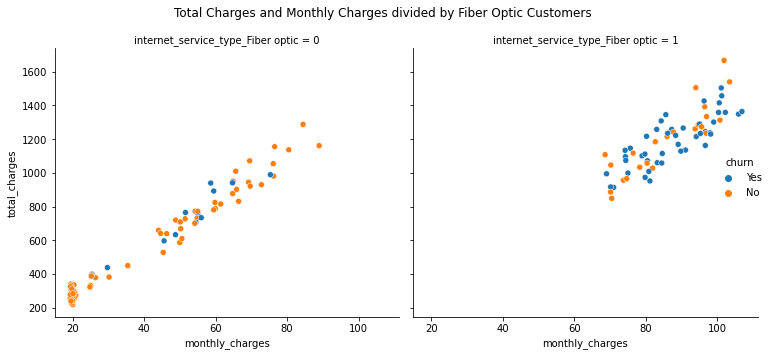

In [615]:
rel = sns.relplot(x='monthly_charges', y='total_charges', data=fifth_customers, col="internet_service_type_Fiber optic", hue="churn")
rel.fig.suptitle('Total Charges and Monthly Charges divided by Fiber Optic Customers') 
plt.tight_layout()

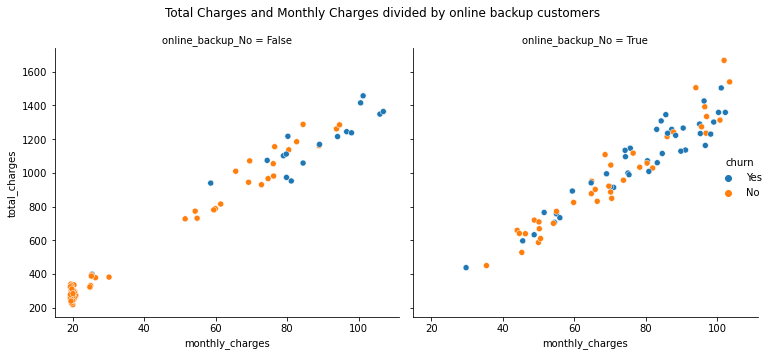

In [616]:
rel = sns.relplot(x='monthly_charges', y='total_charges', data=fifth_customers, col="online_backup_No", hue="churn")
rel.fig.suptitle('Total Charges and Monthly Charges divided by online backup customers') 
plt.tight_layout()

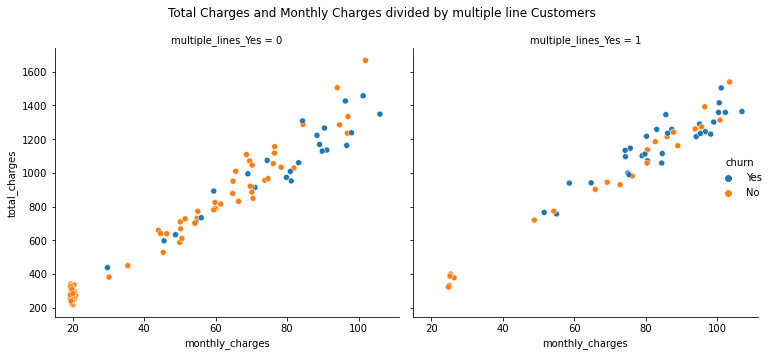

In [648]:
rel = sns.relplot(x='monthly_charges', y='total_charges', data=fifth_customers, col="multiple_lines_Yes", hue="churn")
rel.fig.suptitle('Total Charges and Monthly Charges divided by multiple line Customers') 
plt.tight_layout()

Feature Importance 12-15 mos: 
- internet_service_type_Fiber optic 
- online_backup_No 
- multiple lines


In [618]:
sixth_customers.head(3)

,senior_citizen,tenure,monthly_charges,total_charges,churn,is_female,has_partner,has_dependents,has_phone_svc,has_paperless_bill,has_churned,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,dsl,device_protection_no,online_security_No,tech_support_No,online_backup_No,onine_backup_No
3171,0,16,72.65,1194.30,Yes,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,1,True,1
1287,0,16,19.30,360.35,No,1,0,1,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,False,0
3484,1,17,20.65,330.60,No,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,False,0


In [565]:
sixth_customers = sixth_customers.drop(columns=['gender', 'partner', 'dependents', 'tenure_bin', 'phone_service', 'multiple_lines',  'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'internet_service_type', 'contract_type', 'payment_type'])

In [619]:
X_train6 = sixth_customers.drop(columns=['churn', 'has_churned'])
y_train6 = sixth_customers.churn

In [620]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [621]:
clf = clf.fit(X_train6, y_train6)

In [622]:
y_pred = clf.predict(X_train6)

In [623]:
y_pred_proba = clf.predict_proba(X_train6)

In [624]:
X_train6.columns[clf.feature_importances_.argsort()[::-1]]

Index(['internet_service_type_Fiber optic', 'monthly_charges',
       'online_security_No', 'device_protection_no', 'contract_type_One year',
       'online_backup_No internet service', 'online_security_Yes',
       'online_security_No internet service', 'multiple_lines_Yes',
       'multiple_lines_No phone service', 'has_paperless_bill',
       'onine_backup_No', 'has_phone_svc',
       'device_protection_No internet service', 'has_dependents',
       'has_partner', 'is_female', 'total_charges', 'tenure',
       'online_backup_Yes', 'tech_support_No internet service',
       'device_protection_Yes', 'online_backup_No', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'contract_type_Two year', 'internet_service_type_None',
       'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check', 'dsl', 'tech_support_No',
       'senio

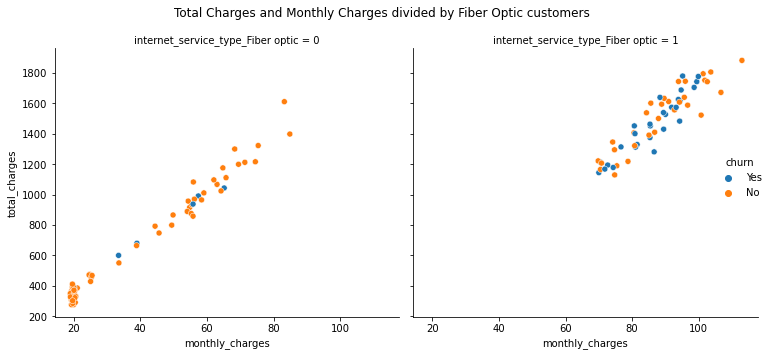

In [649]:
rel = sns.relplot(x='monthly_charges', y='total_charges', data=sixth_customers, col="internet_service_type_Fiber optic", hue="churn")
rel.fig.suptitle('Total Charges and Monthly Charges divided by Fiber Optic customers') 
plt.tight_layout()

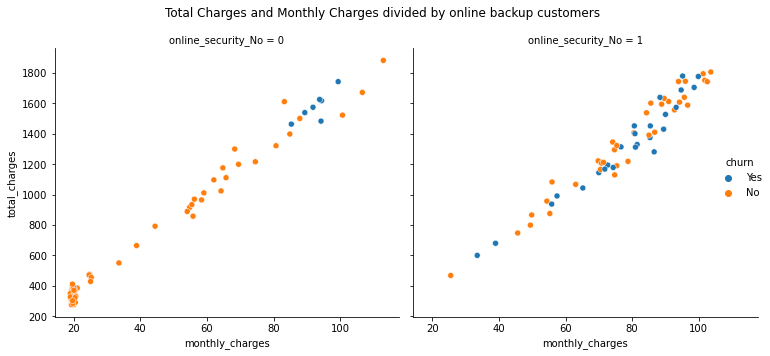

In [650]:
rel = sns.relplot(x='monthly_charges', y='total_charges', data=sixth_customers, col="online_security_No", hue="churn")
rel.fig.suptitle('Total Charges and Monthly Charges divided by online backup customers') 
plt.tight_layout()

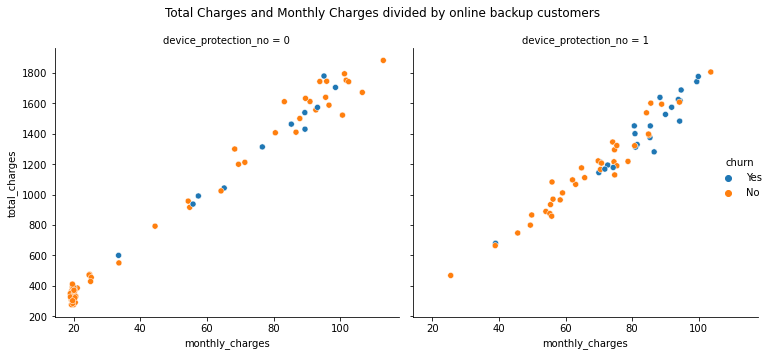

In [651]:
rel = sns.relplot(x='monthly_charges', y='total_charges', data=sixth_customers, col="device_protection_no", hue="churn")
rel.fig.suptitle('Total Charges and Monthly Charges divided by online backup customers') 
plt.tight_layout()

In [629]:
seventh_customers.head(3)

,senior_citizen,tenure,monthly_charges,total_charges,churn,is_female,has_partner,has_dependents,has_phone_svc,has_paperless_bill,has_churned,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,dsl,device_protection_no,online_security_No,tech_support_No,online_backup_No,onine_backup_No
6279,1,20,54.00,1055.9,No,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,True,1
2814,0,19,61.55,1093.2,No,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,True,1
3029,1,20,94.30,1818.3,No,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,True,1


In [631]:
#seventh_customers = seventh_customersa.drop(columns=['gender', 'partner', 'dependents', 'tenure_bin', 'phone_service', 'multiple_lines',  'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'internet_service_type', 'contract_type', 'payment_type'])

In [632]:
X_train6 = seventh_customers.drop(columns=['churn', 'has_churned'])
y_train6 = seventh_customers.churn

In [633]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [634]:
clf = clf.fit(X_train6, y_train6)

In [635]:
y_pred = clf.predict(X_train6)

In [636]:
y_pred_proba = clf.predict_proba(X_train6)

In [637]:
X_train6.columns[clf.feature_importances_.argsort()[::-1]]

Index(['internet_service_type_Fiber optic', 'total_charges',
       'streaming_movies_Yes', 'onine_backup_No', 'online_backup_Yes',
       'online_backup_No internet service', 'online_security_Yes',
       'online_security_No internet service', 'multiple_lines_Yes',
       'multiple_lines_No phone service', 'has_paperless_bill',
       'device_protection_Yes', 'has_phone_svc', 'has_dependents',
       'has_partner', 'is_female', 'monthly_charges', 'tenure',
       'device_protection_No internet service',
       'tech_support_No internet service', 'online_backup_No',
       'tech_support_Yes', 'streaming_tv_No internet service',
       'streaming_tv_Yes', 'streaming_movies_No internet service',
       'contract_type_One year', 'contract_type_Two year',
       'internet_service_type_None', 'payment_type_Credit card (automatic)',
       'payment_type_Electronic check', 'payment_type_Mailed check', 'dsl',
       'device_protection_no', 'online_security_No', 'tech_support_No',
       'senio

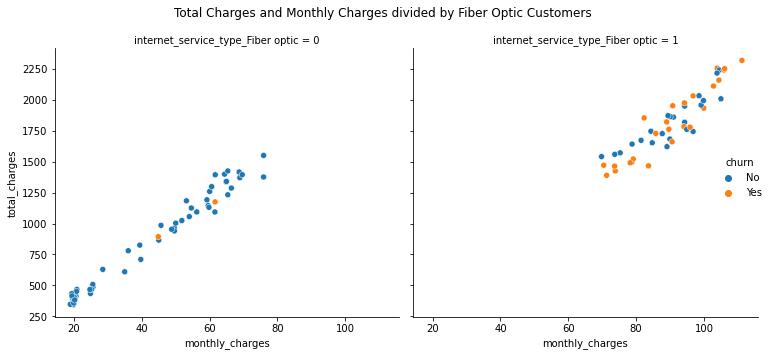

In [652]:
rel = sns.relplot(x='monthly_charges', y='total_charges', data=seventh_customers, col="internet_service_type_Fiber optic", hue="churn")
rel.fig.suptitle('Total Charges and Monthly Charges divided by Fiber Optic Customers') 
plt.tight_layout()

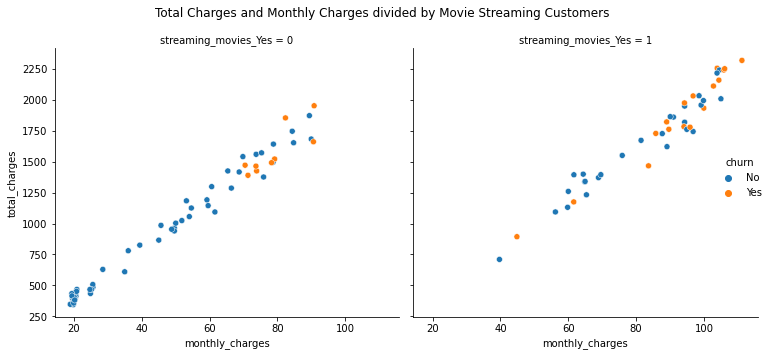

In [657]:
rel = sns.relplot(x='monthly_charges', y='total_charges', data=seventh_customers, col="streaming_movies_Yes", hue="churn")
rel.fig.suptitle('Total Charges and Monthly Charges divided by Movie Streaming Customers') 
plt.tight_layout()

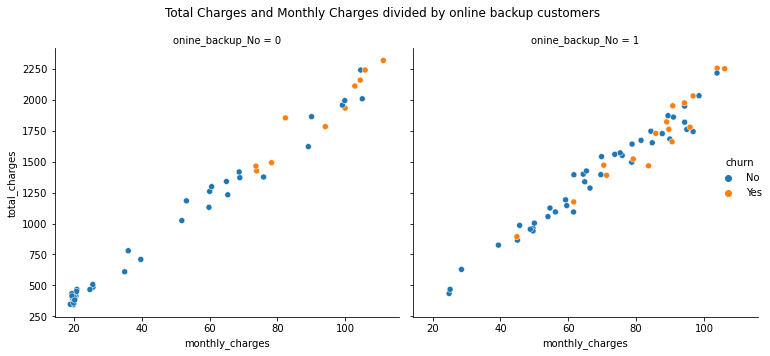

In [658]:
rel = sns.relplot(x='monthly_charges', y='total_charges', data=seventh_customers, col="onine_backup_No", hue="churn")
rel.fig.suptitle('Total Charges and Monthly Charges divided by online backup customers') 
plt.tight_layout()

In [659]:
eighth_customers.head(3)

,senior_citizen,tenure,monthly_charges,total_charges,churn,is_female,has_partner,has_dependents,has_phone_svc,has_paperless_bill,has_churned,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,dsl,device_protection_no,online_security_No,tech_support_No,online_backup_No,onine_backup_No
333,0,23,49.45,1119.35,No,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,True,1
6331,0,22,20.75,452.35,No,1,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,False,0
2149,0,23,77.15,1759.40,No,1,1,1,1,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,True,1


In [661]:
#eighth_customers = eighth_customers.drop(columns=['gender', 'partner', 'dependents', 'tenure_bin', 'phone_service', 'multiple_lines',  'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'internet_service_type', 'contract_type', 'payment_type'])

In [662]:
X_train6 = sixth_customers.drop(columns=['churn', 'has_churned'])
y_train6 = sixth_customers.churn

In [663]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [664]:
clf = clf.fit(X_train6, y_train6)

In [665]:
y_pred = clf.predict(X_train6)

In [666]:
y_pred_proba = clf.predict_proba(X_train6)

In [667]:
X_train6.columns[clf.feature_importances_.argsort()[::-1]]

Index(['internet_service_type_Fiber optic', 'monthly_charges',
       'online_security_No', 'device_protection_no', 'contract_type_One year',
       'online_backup_No internet service', 'online_security_Yes',
       'online_security_No internet service', 'multiple_lines_Yes',
       'multiple_lines_No phone service', 'has_paperless_bill',
       'onine_backup_No', 'has_phone_svc',
       'device_protection_No internet service', 'has_dependents',
       'has_partner', 'is_female', 'total_charges', 'tenure',
       'online_backup_Yes', 'tech_support_No internet service',
       'device_protection_Yes', 'online_backup_No', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'contract_type_Two year', 'internet_service_type_None',
       'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check', 'dsl', 'tech_support_No',
       'senio

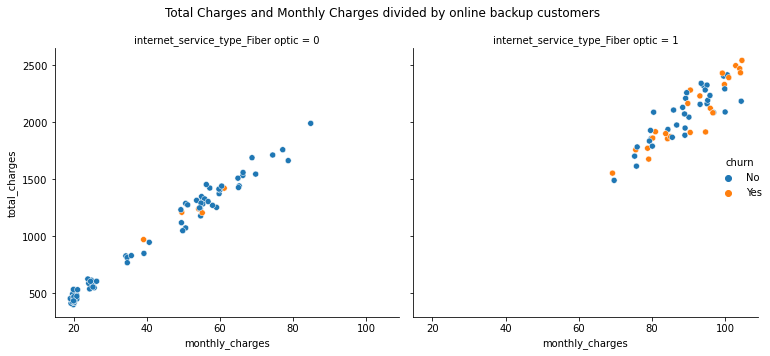

In [668]:
rel = sns.relplot(x='monthly_charges', y='total_charges', data=eighth_customers, col="internet_service_type_Fiber optic", hue="churn")
rel.fig.suptitle('Total Charges and Monthly Charges divided by online backup customers') 
plt.tight_layout()

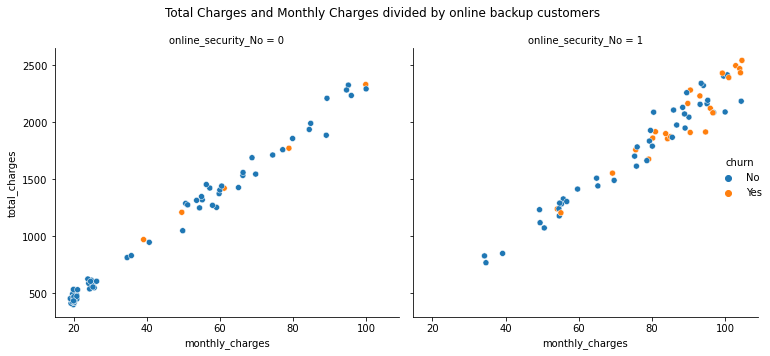

In [669]:
rel = sns.relplot(x='monthly_charges', y='total_charges', data=eighth_customers, col="online_security_No", hue="churn")
rel.fig.suptitle('Total Charges and Monthly Charges divided by online backup customers') 
plt.tight_layout()

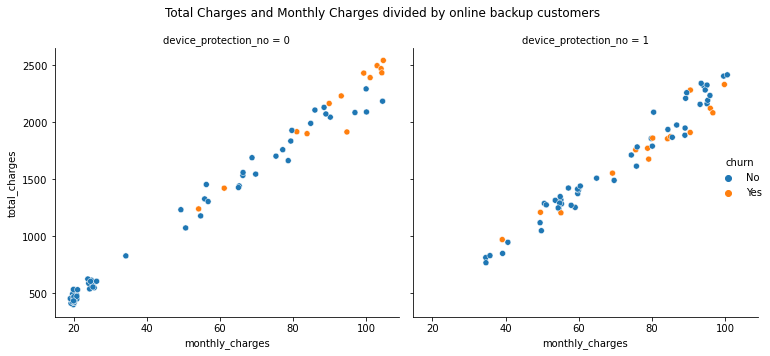

In [671]:
rel = sns.relplot(x='monthly_charges', y='total_charges', data=eighth_customers, col="device_protection_no", hue="churn")
rel.fig.suptitle('Total Charges and Monthly Charges divided by online backup customers') 
plt.tight_layout()

In [574]:
train.tenure.value_counts()

1     351
72    213
2     141
3     112
4     104
71    101
7      75
10     70
68     66
5      65
8      65
13     65
12     64
9      63
6      62
67     59
69     53
70     53
62     53
52     52
56     50
53     50
66     50
15     49
24     49
22     48
64     48
11     48
18     48
26     47
46     45
34     44
35     43
23     43
30     42
25     42
61     42
19     42
27     41
48     41
32     41
16     40
17     40
63     40
55     40
65     40
42     40
41     40
20     39
31     39
40     39
60     39
45     38
47     38
14     37
29     37
37     37
33     36
49     36
54     35
57     35
58     33
28     33
50     32
21     32
38     32
44     30
43     30
51     29
39     29
59     28
36     24
Name: tenure, dtype: int64

In [511]:
def bin_tenure(tenure):
    if tenure <= 3: 
        return "brand_new"
    elif tenure > 3 and tenure <= 6:
        return "btwn_three_and_six"
    elif tenure > 6 and tenure <= 9: 
        return "btwn_six_and_nine"
    elif tenure > 9 and tenure <=12:
        return "btwn_nine_and_twelve"
    elif tenure > 12 and tenure <= 15:
        return "btwn_twelve_and_fifteen"
    elif tenure > 15 and tenure <= 18:
        return "btwn_fifteen_and_eighteen"
    elif tenure > 18 and tenure <= 21: 
        return "btwn_eighteen_and_twentyone"
    elif tenure > 21 and tenure <=24:
        return "btwn_twentyone_and_twentyfour"
    elif tenure > 24 and tenure <= 27:
        return "btwn_twentyfour_and_twentyseven"
    elif tenure > 27 and tenure <= 30:
        return "btwn_twentyseven_and_thirty"
    elif tenure > 30 and tenure <= 33: 
        return "btwn_thirty_and_thirtythree"
    elif tenure > 33 and tenure <=36:
        return "btwn_thirtythree_and_thirtysix"
    else: 
        return "over_three_years"
   
    
    
    

In [512]:
train["tenure_bin"] = train.tenure.apply(bin_tenure)

In [513]:
new_customers = train[train.tenure_bin == "brand_new"]
second_customers = train[train.tenure_bin == "btwn_three_and_six"]
third_customers = train[train.tenure_bin == "btwn_six_and_nine"]
fourth_customers = train[train.tenure_bin == "btwn_nine_and_twelve"]
fifth_customers = train[train.tenure_bin == "btwn_twelve_and_fifteen"]
sixth_customers = train[train.tenure_bin == "btwn_fifteen_and_eighteen"]
seventh_customers = train[train.tenure_bin == "btwn_eighteen_and_twentyone"]
eighth_customers = train[train.tenure_bin == "btwn_twentyone_and_twentyfour"]
ninth_customers = train[train.tenure_bin == "btwn_twentyfour_and_twentyseven"]
tenth_customers = train[train.tenure_bin == "btwn_twentyseven_and_thirty"]
eleventh_customers = train[train.tenure_bin == "btwn_thirty_and_thirtythree"]
twelfth_customers = train[train.tenure_bin == "btwn_thirtythree_and_thirtysix"]
thirteenth_customers = train[train.tenure_bin == "over_three_years"]

In [514]:
new_customers.value_counts().sum()

604

In [128]:
second_customers.value_counts().sum()

231

In [129]:
third_customers.value_counts().sum()

203

In [130]:
fourth_customers.value_counts().sum()

182

In [131]:
fifth_customers.value_counts().sum()

151

In [186]:
sixth_customers.value_counts().sum()

128

In [187]:
seventh_customers.value_counts().sum()

113

In [188]:
eighth_customers.value_counts().sum()

140

In [189]:
ninth_customers.value_counts().sum()

130

In [190]:
tenth_customers.value_counts().sum()

112

In [191]:
eleventh_customers.value_counts().sum()

116

In [192]:
twelfth_customers.value_counts().sum()

111

In [193]:
thirteenth_customers.value_counts().sum()

1716

In [141]:
new_customers.describe()[1:2]

,senior_citizen,tenure,monthly_charges,total_charges,is_female,has_partner,has_dependents,has_phone_svc,has_paperless_bill,has_churned,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
mean,0.153974,1.604305,52.779139,87.163245,0.493377,0.175497,0.149007,0.885762,0.571192,0.581126,0.114238,0.178808,0.253311,0.072848,0.253311,0.119205,0.253311,0.10596,0.253311,0.076159,0.253311,0.160596,0.253311,0.175497,0.018212,0.006623,0.410596,0.253311,0.072848,0.47351,0.379139


In [142]:
second_customers.describe()[1:2]

,senior_citizen,tenure,monthly_charges,total_charges,is_female,has_partner,has_dependents,has_phone_svc,has_paperless_bill,has_churned,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
mean,0.125541,4.818182,54.591126,261.554329,0.515152,0.30303,0.21645,0.87013,0.575758,0.419913,0.12987,0.264069,0.242424,0.151515,0.242424,0.186147,0.242424,0.160173,0.242424,0.155844,0.242424,0.225108,0.242424,0.194805,0.038961,0.025974,0.380952,0.242424,0.112554,0.458874,0.341991


In [143]:
third_customers.describe()[1:2]

,senior_citizen,tenure,monthly_charges,total_charges,is_female,has_partner,has_dependents,has_phone_svc,has_paperless_bill,has_churned,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
mean,0.162562,7.940887,62.074631,497.283498,0.512315,0.35468,0.261084,0.91133,0.630542,0.359606,0.08867,0.275862,0.182266,0.172414,0.182266,0.187192,0.182266,0.226601,0.182266,0.172414,0.182266,0.344828,0.182266,0.334975,0.083744,0.039409,0.463054,0.182266,0.108374,0.408867,0.300493


In [144]:
fourth_customers.describe()[1:2]

,senior_citizen,tenure,monthly_charges,total_charges,is_female,has_partner,has_dependents,has_phone_svc,has_paperless_bill,has_churned,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
mean,0.126374,10.967033,57.960989,634.790659,0.483516,0.335165,0.236264,0.895604,0.626374,0.32967,0.104396,0.324176,0.252747,0.208791,0.252747,0.241758,0.252747,0.236264,0.252747,0.192308,0.252747,0.241758,0.252747,0.335165,0.153846,0.043956,0.384615,0.252747,0.164835,0.412088,0.258242


In [145]:
fifth_customers.describe()[1:2]

,senior_citizen,tenure,monthly_charges,total_charges,is_female,has_partner,has_dependents,has_phone_svc,has_paperless_bill,has_churned,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
mean,0.18543,13.89404,61.754636,849.916556,0.503311,0.417219,0.291391,0.94702,0.582781,0.377483,0.05298,0.357616,0.251656,0.172185,0.251656,0.245033,0.251656,0.264901,0.251656,0.18543,0.251656,0.344371,0.251656,0.350993,0.165563,0.092715,0.443709,0.251656,0.15894,0.417219,0.304636


In [146]:
sixth_customers.describe()[1:2]

,senior_citizen,tenure,monthly_charges,total_charges,is_female,has_partner,has_dependents,has_phone_svc,has_paperless_bill,has_churned,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
mean,0.15625,17.0625,61.124219,1042.865234,0.445312,0.414062,0.3125,0.945312,0.523438,0.265625,0.054688,0.359375,0.273438,0.242188,0.273438,0.21875,0.273438,0.28125,0.273438,0.15625,0.273438,0.34375,0.273438,0.273438,0.164062,0.101562,0.460938,0.273438,0.242188,0.304688,0.273438


In [147]:
seventh_customers.describe()[1:2]

,senior_citizen,tenure,monthly_charges,total_charges,is_female,has_partner,has_dependents,has_phone_svc,has_paperless_bill,has_churned,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
mean,0.19469,19.911504,61.763274,1239.235398,0.442478,0.380531,0.292035,0.920354,0.610619,0.230088,0.079646,0.318584,0.230088,0.20354,0.230088,0.256637,0.230088,0.274336,0.230088,0.20354,0.230088,0.336283,0.230088,0.389381,0.176991,0.070796,0.424779,0.230088,0.141593,0.300885,0.362832


In [148]:
eighth_customers.describe()[1:2]

,senior_citizen,tenure,monthly_charges,total_charges,is_female,has_partner,has_dependents,has_phone_svc,has_paperless_bill,has_churned,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
mean,0.15,23.007143,60.806071,1405.942143,0.442857,0.478571,0.335714,0.921429,0.578571,0.207143,0.078571,0.392857,0.257143,0.278571,0.257143,0.264286,0.257143,0.285714,0.257143,0.257143,0.257143,0.3,0.257143,0.328571,0.278571,0.107143,0.407143,0.257143,0.171429,0.3,0.328571


In [149]:
ninth_customers.describe()[1:2]

,senior_citizen,tenure,monthly_charges,total_charges,is_female,has_partner,has_dependents,has_phone_svc,has_paperless_bill,has_churned,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
mean,0.2,25.992308,61.011154,1580.758462,0.476923,0.392308,0.276923,0.9,0.592308,0.238462,0.1,0.353846,0.276923,0.238462,0.276923,0.307692,0.276923,0.269231,0.276923,0.246154,0.276923,0.369231,0.276923,0.330769,0.276923,0.123077,0.438462,0.276923,0.269231,0.323077,0.169231


In [150]:
tenth_customers.describe()[1:2]

,senior_citizen,tenure,monthly_charges,total_charges,is_female,has_partner,has_dependents,has_phone_svc,has_paperless_bill,has_churned,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
mean,0.178571,29.080357,66.756696,1936.955357,0.473214,0.544643,0.339286,0.901786,0.553571,0.205357,0.098214,0.455357,0.160714,0.258929,0.160714,0.348214,0.160714,0.321429,0.160714,0.321429,0.160714,0.375,0.160714,0.410714,0.303571,0.071429,0.455357,0.160714,0.223214,0.357143,0.223214


In [151]:
eleventh_customers.describe()[1:2]

,senior_citizen,tenure,monthly_charges,total_charges,is_female,has_partner,has_dependents,has_phone_svc,has_paperless_bill,has_churned,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
mean,0.189655,31.974138,70.236207,2235.396121,0.482759,0.5,0.293103,0.931034,0.646552,0.224138,0.068966,0.517241,0.172414,0.232759,0.172414,0.396552,0.172414,0.310345,0.172414,0.301724,0.172414,0.413793,0.172414,0.448276,0.293103,0.103448,0.543103,0.172414,0.267241,0.344828,0.172414


In [152]:
twelfth_customers.describe()[1:2]

,senior_citizen,tenure,monthly_charges,total_charges,is_female,has_partner,has_dependents,has_phone_svc,has_paperless_bill,has_churned,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
mean,0.207207,34.81982,65.456306,2273.607658,0.504505,0.504505,0.315315,0.891892,0.585586,0.198198,0.108108,0.486486,0.225225,0.288288,0.225225,0.306306,0.225225,0.342342,0.225225,0.279279,0.225225,0.45045,0.225225,0.405405,0.288288,0.135135,0.45045,0.225225,0.198198,0.405405,0.207207


In [153]:
thirteenth_customers.describe()[1:2]

,senior_citizen,tenure,monthly_charges,total_charges,is_female,has_partner,has_dependents,has_phone_svc,has_paperless_bill,has_churned,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
mean,0.160256,57.915501,72.282284,4230.06757,0.512821,0.66958,0.378205,0.907925,0.594406,0.126457,0.092075,0.572844,0.198718,0.444056,0.198718,0.516317,0.198718,0.521562,0.198718,0.434732,0.198718,0.520979,0.198718,0.522727,0.29662,0.483683,0.448718,0.198718,0.329254,0.229604,0.126457


### Online Security 

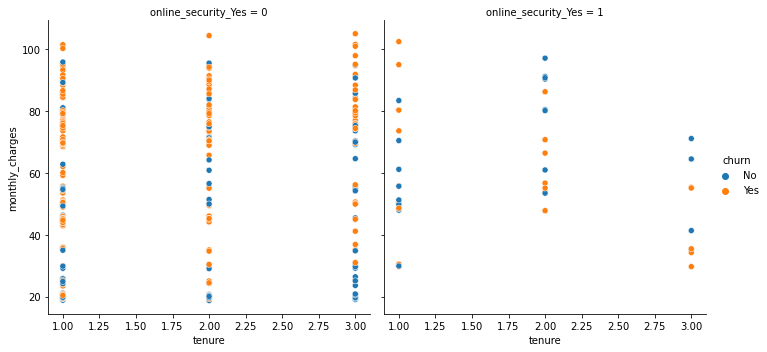

In [162]:
#tenure/monthly charges/churn 
#tenure[customers with device protection]
sns.relplot(x='tenure', y='monthly_charges', hue='churn', col='online_security_Yes', data=new_customers)

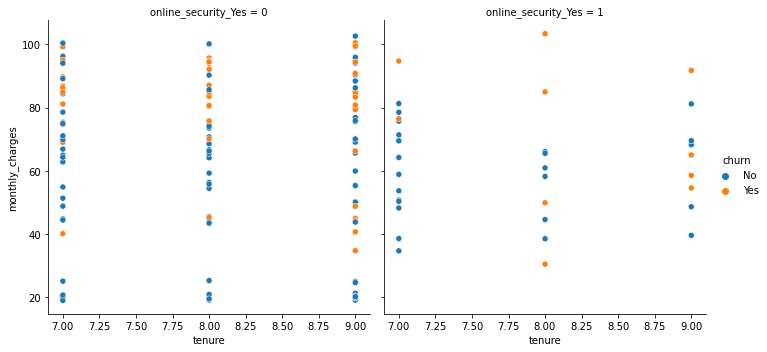

In [166]:
sns.relplot(x='tenure', y='monthly_charges', hue='churn', col='online_security_Yes', data=third_customers)

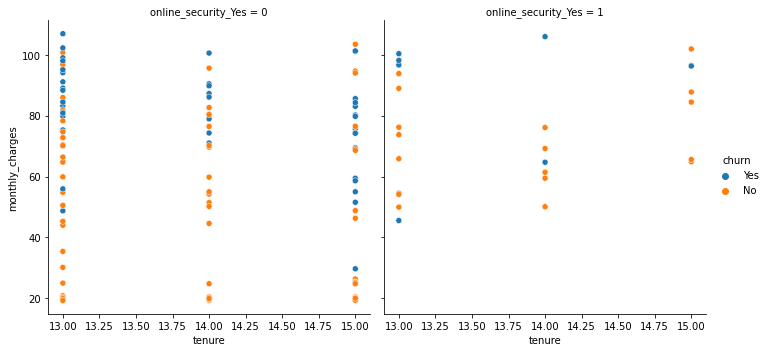

In [167]:
sns.relplot(x='tenure', y='monthly_charges', hue='churn', col='online_security_Yes', data=fifth_customers)

### Online Backup

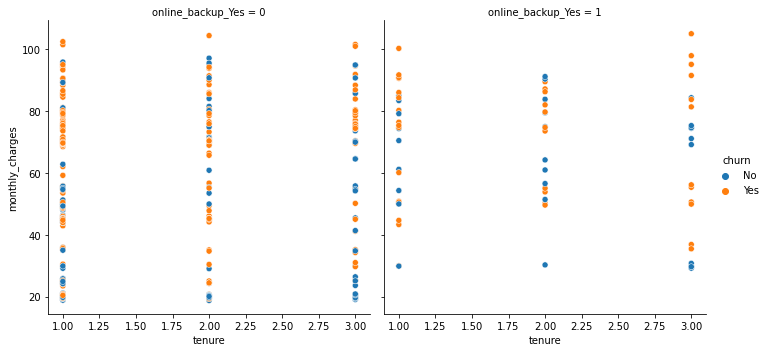

In [163]:
sns.relplot(x='tenure', y='monthly_charges', hue='churn', col='online_backup_Yes', data=new_customers)

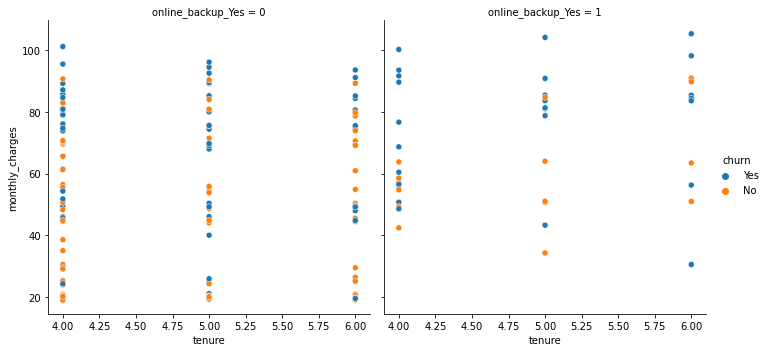

In [175]:
sns.relplot(x='tenure', y='monthly_charges', hue='churn', col='online_backup_Yes', data=second_customers)

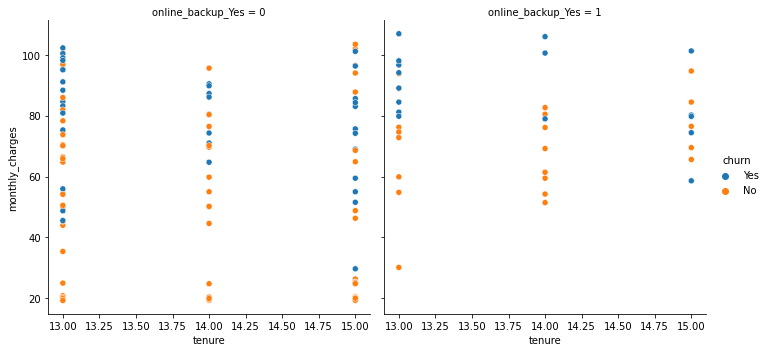

In [176]:
sns.relplot(x='tenure', y='monthly_charges', hue='churn', col='online_backup_Yes', data=fifth_customers)

### Device Protection

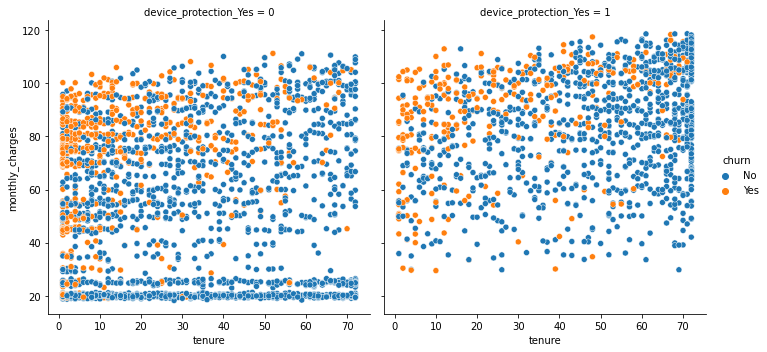

In [183]:
sns.relplot(x='tenure', y='monthly_charges', hue='churn', col='device_protection_Yes', data=train)

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

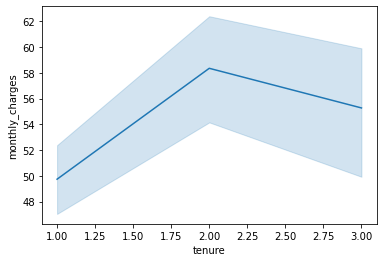

In [185]:
sns.lineplot(data=new_customers, x="tenure", y="monthly_charges")

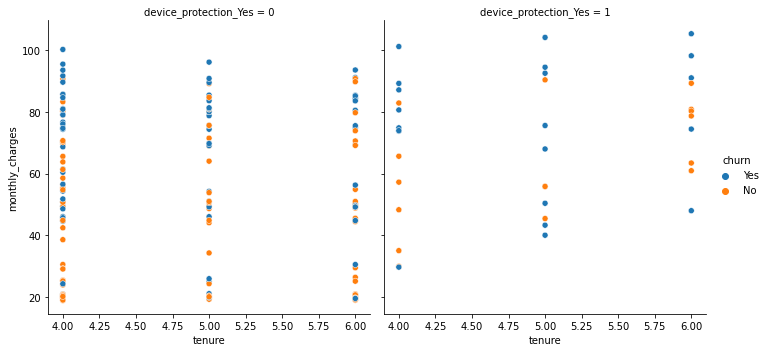

In [177]:
sns.relplot(x='tenure', y='monthly_charges', hue='churn', col='device_protection_Yes', data=second_customers)

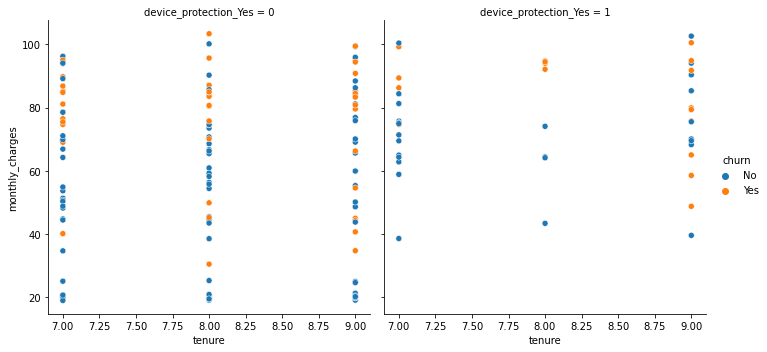

In [178]:
sns.relplot(x='tenure', y='monthly_charges', hue='churn', col='device_protection_Yes', data=third_customers)

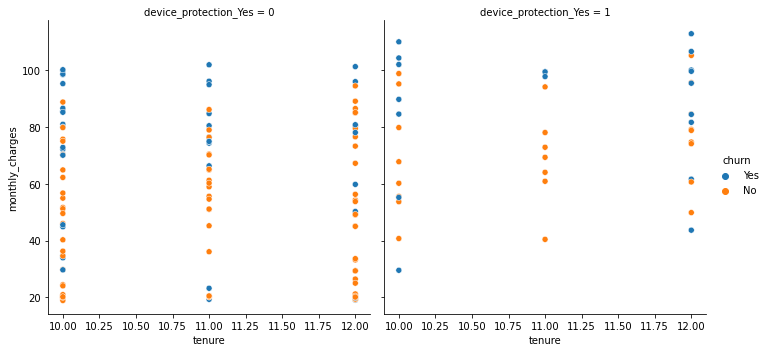

In [179]:
sns.relplot(x='tenure', y='monthly_charges', hue='churn', col='device_protection_Yes', data=fourth_customers)

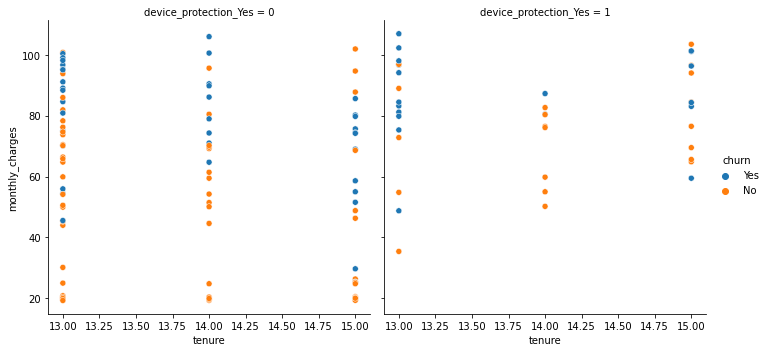

In [180]:
sns.relplot(x='tenure', y='monthly_charges', hue='churn', col='device_protection_Yes', data=fifth_customers)

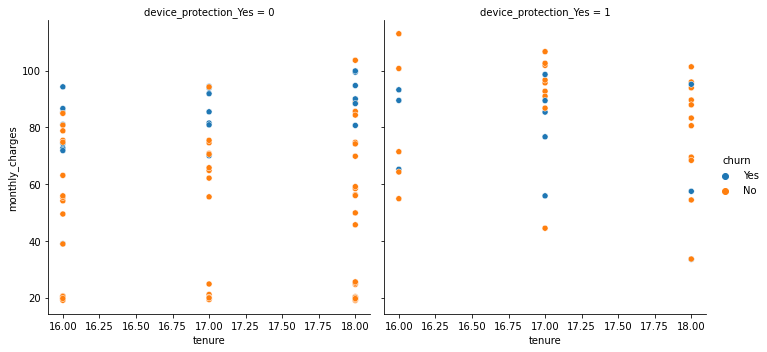

In [181]:
sns.relplot(x='tenure', y='monthly_charges', hue='churn', col='device_protection_Yes', data=sixth_customers)

### Tech Support

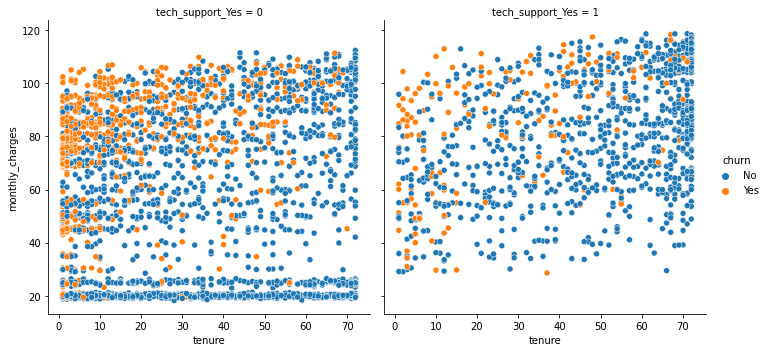

In [184]:
sns.relplot(x='tenure', y='monthly_charges', hue='churn', col='tech_support_Yes', data=train)

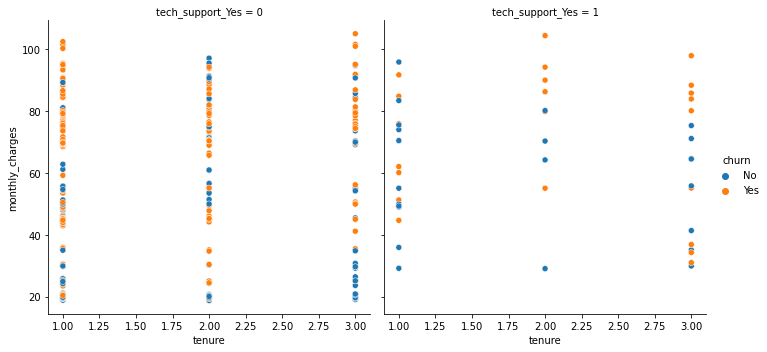

In [165]:
sns.relplot(x='tenure', y='monthly_charges', hue='churn', col='tech_support_Yes', data=new_customers)

In [ ]:
train.columns

In [ ]:
train.head()

In [ ]:
train.describe()

In [ ]:
train['tenure'].hist()

In [ ]:
greater_than_sixty = df['tenure'] >= 60

In [ ]:
loyal_customers = df[greater_than_sixty]
loyal_customers

In [ ]:
loyal_customers['gender'].hist()

In [ ]:
loyal_customers['senior_citizen'].hist()

In [ ]:
loyal_customers['partner'].hist()

In [ ]:
loyal_customers['dependents'].hist()

In [ ]:
loyal_customers['monthly_charges'].hist()

In [ ]:
loyal_customers['total_charges'].hist()